In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
sns.set_style("whitegrid")
sns.set_palette("viridis")

### Data Loading

In [32]:
train_df = pd.read_csv("data/train.csv", on_bad_lines='skip')
test_df = pd.read_csv("data/test.csv", on_bad_lines='skip')
val_df = pd.read_csv("data/val.csv", on_bad_lines='skip')

In [33]:
def swap_columns(row):
    try:
        # Try to convert the Age to a float
        float(row['Age'])
    except ValueError:
        # If conversion fails, swap the values
        row['Age'], row['Gender'] = row['Gender'], row['Age']
    return row

In [34]:
train_df = train_df.apply(swap_columns, axis=1)
test_df = test_df.apply(swap_columns, axis=1)
val_df = val_df.apply(swap_columns, axis=1)

In [35]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
val_df['Age'] = pd.to_numeric(val_df['Age'], errors='coerce')

In [36]:
train_df.drop(index=641, inplace=True)

In [37]:
# Display the structure of the training data
print("Information about the training data:")
train_df.info()

# Check for missing values
print("\nMissing values in the training data:")
train_df.isnull().sum()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(6), object(4)
memory usage: 85.9+ KB

Missing values in the training data:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [38]:

# Display summary statistics
print("\nSummary statistics of the training data:")
train_df.describe()


Summary statistics of the training data:


,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000
std,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


### Exploratory Data Analysis

In [39]:
# Display the first few rows of each dataset
print("First 5 rows of the training data:")
display(train_df.head())

print("\nFirst 5 rows of the test data:")
display(test_df.head())

print("\nFirst 5 rows of the validation data:")
display(val_df.head())


First 5 rows of the training data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom



First 5 rows of the test data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral



First 5 rows of the validation data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31.0,Male,Instagram,170,5,80,20,35,Happiness
1,877,32.0,Female,Instagram,155,6,75,25,38,Happiness
2,230,26.0,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28.0,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28.0,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [40]:
print(train_df['Age'].head())
print(train_df['Age'].dtype)
print(train_df['Age'].isnull().sum())

0    25.0
1    30.0
2    22.0
3    28.0
4    33.0
Name: Age, dtype: float64
float64
0


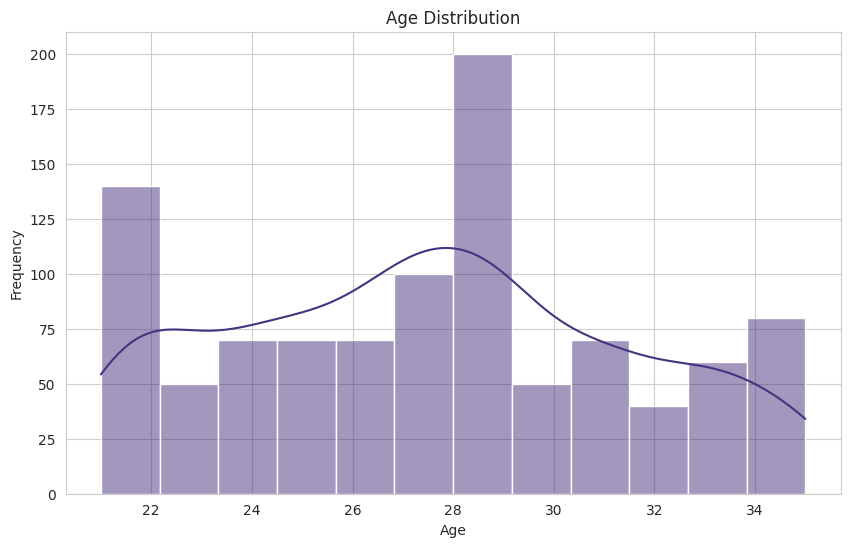

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="Age", kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [42]:
train_df.groupby("Platform")["User_ID"].nunique()

Platform
Facebook     190
Instagram    250
LinkedIn     120
Snapchat      80
Telegram      80
Twitter      200
Whatsapp      80
Name: User_ID, dtype: int64

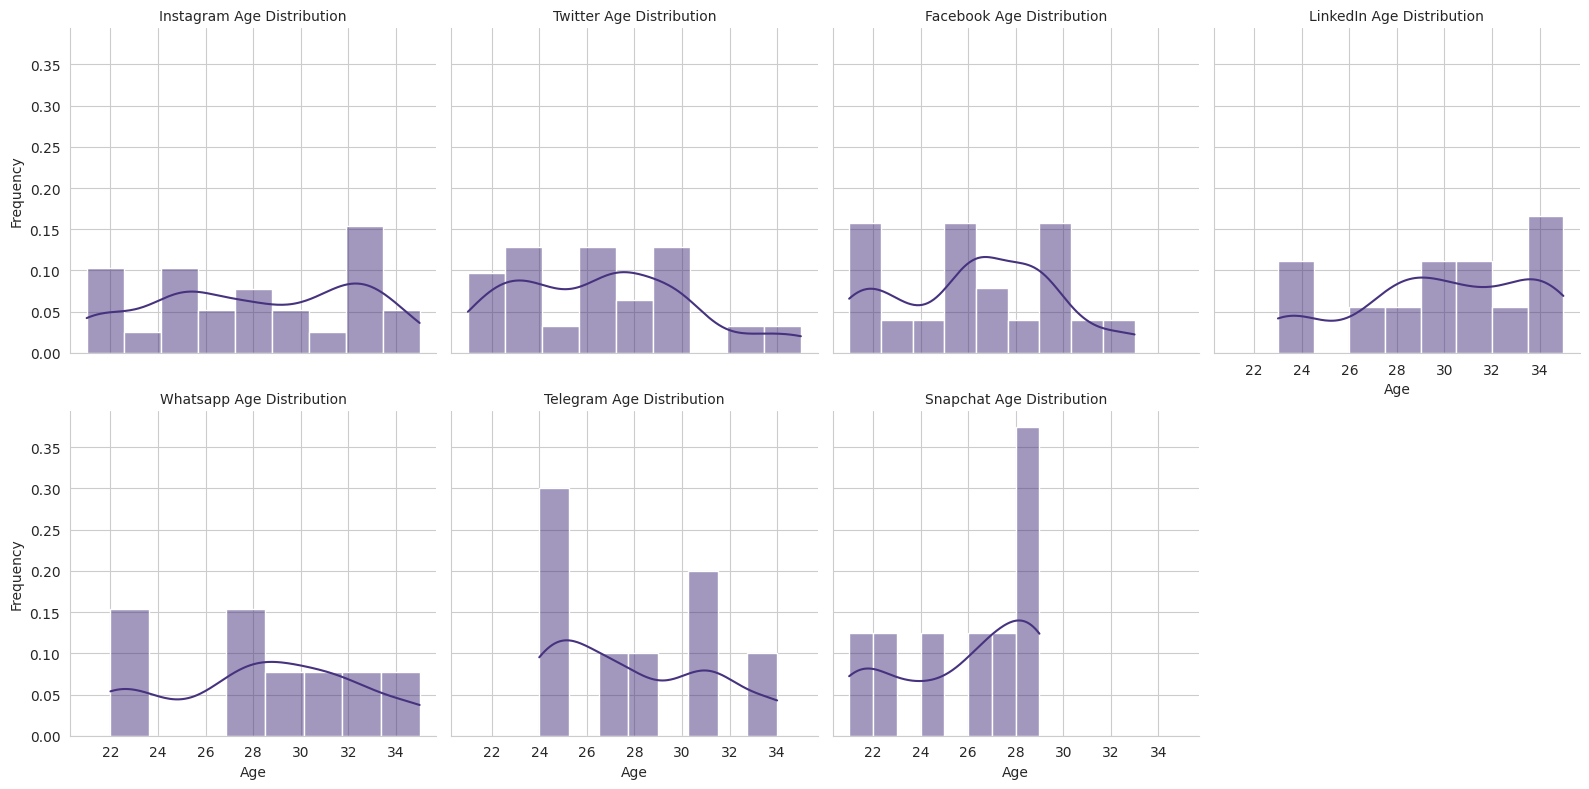

In [43]:
g = sns.FacetGrid(train_df, col="Platform", col_wrap=4, height=4)

# Map a histplot to each subset of data
g.map(sns.histplot, "Age", kde=True, stat="density")

# Add titles and labels
g.set_axis_labels("Age", "Frequency")
g.set_titles("{col_name} Age Distribution")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()


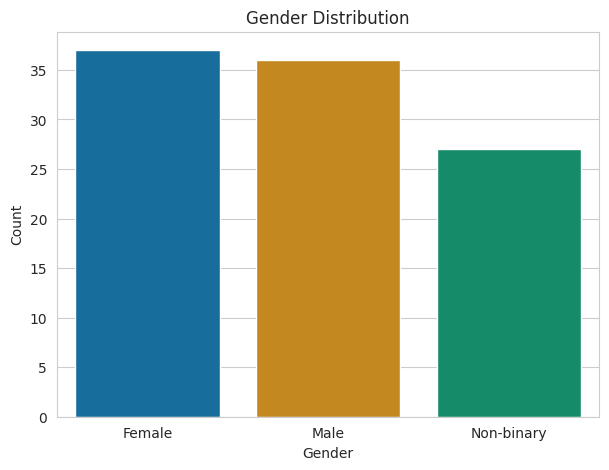

In [44]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df, stat="percent", palette='colorblind', hue="Gender")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_4551/3991373488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean, palette='colorblind', errorbar="sd")


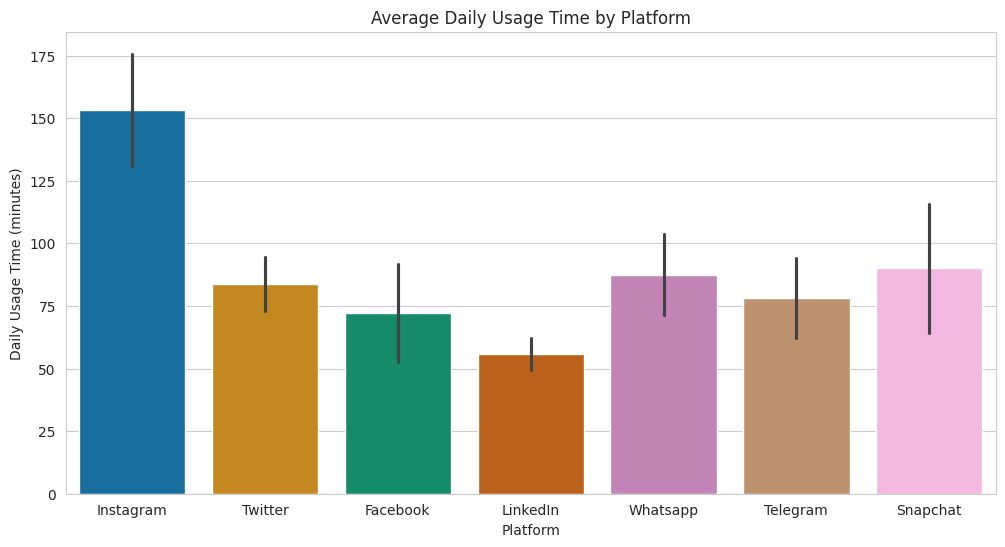

In [45]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean, palette='colorblind', errorbar="sd")
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

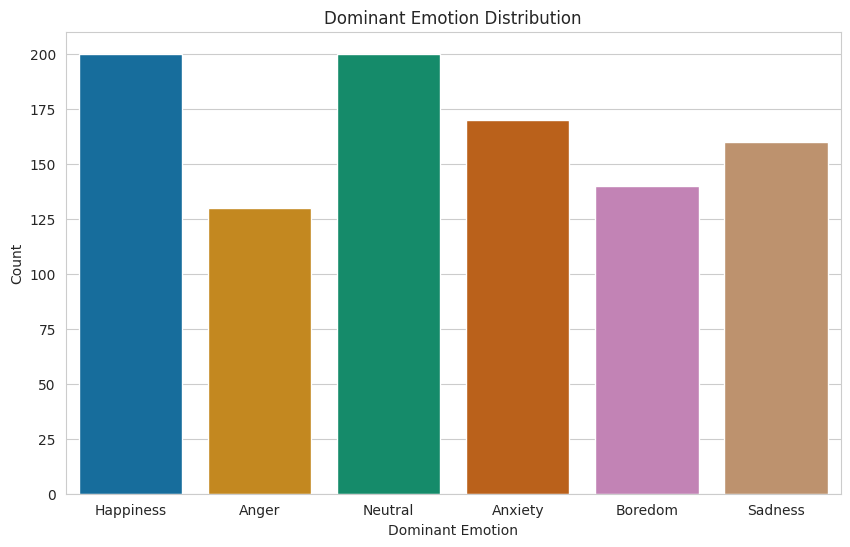

In [46]:
# Plot dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train_df, palette='colorblind', hue="Dominant_Emotion")
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

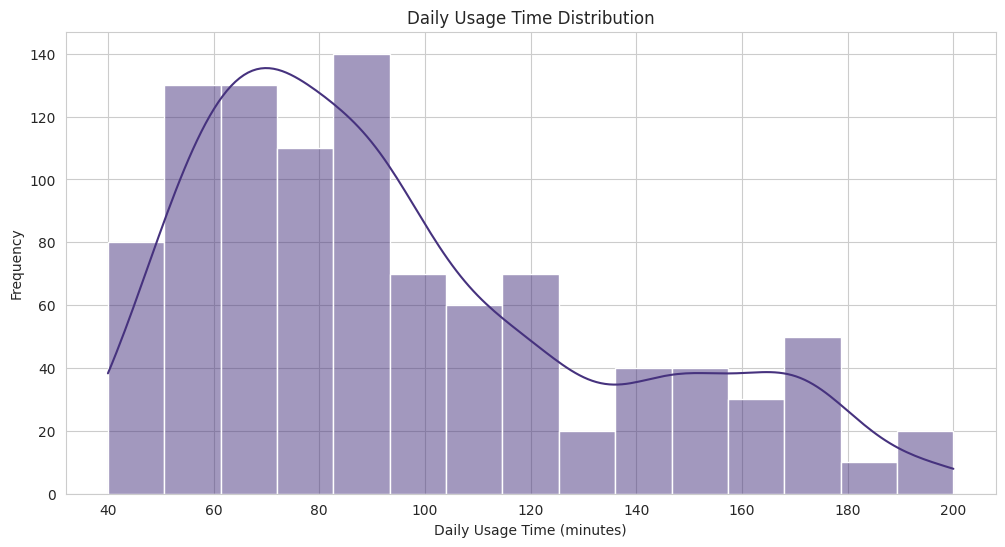

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Daily_Usage_Time (minutes)'], kde=True)
plt.title('Daily Usage Time Distribution')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')
plt.show()

### Data Preprocessing

In [93]:
# Importing machine learning utilities
from sklearn.model_selection import train_test_split  # Utility to split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Metrics to evaluate the performance of a model
from sklearn.preprocessing import LabelEncoder # Label Encoder

# Importing TensorFlow libraries for building the GRU model
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Sequential model type from Keras
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization  # Layers used to build the neural network
from tensorflow.keras.utils import to_categorical # Categorical of data
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
# Check for missing values in the training dataset
print("Missing values in training data:")
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Check for missing values in the validation dataset
print("\nMissing values in validation data:")
print(val_df.isnull().sum())

# Handling missing values (if any) - here, we'll just drop rows with missing values for simplicity
# In a real-world scenario, you might want to impute missing values instead
train_df = train_df.dropna()
test_df = test_df.dropna()
val_df = val_df.dropna()

# Verify that there are no more missing values
print("\nMissing values in training data after dropping rows with missing values:")
print(train_df.isnull().sum())

Missing values in training data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Missing values in test data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Missing values in validation data:
User_ID                       0
Age                           1
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Re

In [50]:
# One-hot encode the categorical variables for train, test, and validation sets
train_df = pd.get_dummies(train_df, columns=['Gender', 'Platform'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Platform'], drop_first=True)
val_df = pd.get_dummies(val_df, columns=['Gender', 'Platform'], drop_first=True)

# Ensure that the columns match in train, test, and validation sets
# Align the test and validation sets with the training set
missing_cols_test = set(train_df.columns) - set(test_df.columns)
for col in missing_cols_test:
    test_df[col] = 0
test_df = test_df[train_df.columns]

missing_cols_val = set(train_df.columns) - set(val_df.columns)
for col in missing_cols_val:
    val_df[col] = 0
val_df = val_df[train_df.columns]

# Verify the changes
print("Columns in training data:", train_df.columns)
print("\nColumns in test data after encoding and alignment:", test_df.columns)
print("\nColumns in validation data after encoding and alignment:", val_df.columns)

Columns in training data: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in test data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in validation data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       '

In [51]:
# Ensure that we use consistent label encoding for the target variable across all data splits
label_encoder = LabelEncoder()

# Combine all the labels from train, test, and validation sets to create a unified label encoder
all_labels = list(train_df['Dominant_Emotion']) + list(test_df['Dominant_Emotion']) + list(val_df['Dominant_Emotion'])
label_encoder.fit(all_labels)

# Encode the target variable in each dataset
y_train_encoded = label_encoder.transform(train_df['Dominant_Emotion'])
y_test_encoded = label_encoder.transform(test_df['Dominant_Emotion'])
y_val_encoded = label_encoder.transform(val_df['Dominant_Emotion'])

# Define features and target variable for each dataset
X_train = train_df.drop('Dominant_Emotion', axis=1)
X_test = test_df.drop('Dominant_Emotion', axis=1)
X_val = val_df.drop('Dominant_Emotion', axis=1)

# Verify the feature names
print("Feature names in train data:", X_train.columns.tolist())
print("Feature names in test data:", X_test.columns.tolist())
print("Feature names in validation data:", X_val.columns.tolist())

# Select only numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Verify the numeric columns
print("Numeric columns in the dataset:", numeric_columns)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_val_scaled = scaler.transform(X_val[numeric_columns])

# Verify the scaling
print("Scaled feature sample (first 5 rows of the training data):")
print(X_train_scaled[:5])

Feature names in train data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in test data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in validation data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platf

### Neural Network

In [52]:
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
y_val_one_hot = to_categorical(y_val_encoded)

# Ensure the input data is in the correct format (3D array for GRU)
X_train_gru = np.expand_dims(X_train_scaled, axis=1)
X_test_gru = np.expand_dims(X_test_scaled, axis=1)
X_val_gru = np.expand_dims(X_val_scaled, axis=1)

print("Shape of X_train for GRU:", X_train_gru.shape)
print("Shape of Y_train for GRU:", y_train_one_hot.shape)

Shape of X_train for GRU: (1000, 1, 6)
Shape of Y_train for GRU: (1000, 7)


In [53]:
# Define a custom and more effective activation function combining multiple properties
@tf.function
def custom_activation(x):
    # Combination of sigmoid, tanh, ReLU, and a linear transformation
    tanh = tf.keras.activations.tanh(x)
    relu = tf.keras.activations.relu(x)
    return tanh + relu * 1.5

# Test the custom activation function
print("Testing custom activation function with sample input:")
sample_input = np.array([0.5, 1.0, 1.5, 2.0])
print(custom_activation(sample_input))

Testing custom activation function with sample input:
tf.Tensor([1.21211716 2.26159416 3.15514825 3.96402758], shape=(4,), dtype=float64)


In [114]:
# Clear any existing models in the session
tf.keras.backend.clear_session()

# Build the GRU neural network with the updated custom activation function
model = Sequential()

# Adding the first GRU layer with the updated custom activation function
model.add(GRU(32, activation="relu", return_sequences=True, input_shape=(1, X_train_gru.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Adding additional GRU layers
model.add(GRU(128, activation=custom_activation, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(GRU(64, activation=custom_activation, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Adding a dense layer for classification
model.add(Dense(32, activation="tanh", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Output layer with the number of classes for the target variable
output_classes = y_train_one_hot.shape[1]
model.add(Dense(output_classes, activation='softmax'))

# Summary of the model
model.summary()

# Confirm the total parameters to ensure it's around 2 million
total_params = sum([tf.size(v).numpy() for v in model.trainable_variables])
print("Total trainable parameters: ", total_params)

/home/gorka/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,631 (416.53 KB)

 Trainable params: 106,119 (414.53 KB)

 Non-trainable params: 512 (2.00 KB)

Total trainable parameters:  106119


In [115]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary again to ensure everything is correct
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,631 (416.53 KB)

 Trainable params: 106,119 (414.53 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1877 - loss: 4.7449 - val_accuracy: 0.4167 - val_loss: 3.9370
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3131 - loss: 4.0164 - val_accuracy: 0.4514 - val_loss: 3.5341
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3688 - loss: 3.5264 - val_accuracy: 0.4375 - val_loss: 3.2844
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3820 - loss: 3.2678 - val_accuracy: 0.4375 - val_loss: 3.0989
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4000 - loss: 3.1015 - val_accuracy: 0.4514 - val_loss: 2.9480
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4457 - loss: 2.9146 - val_accuracy: 0.4792 - val_loss: 2.8092
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4313 - loss: 2.8344 - val_accuracy: 0.5000 - val_loss: 2.6854
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4288 - loss: 2.7590 - val_accuracy: 0.5139 - 

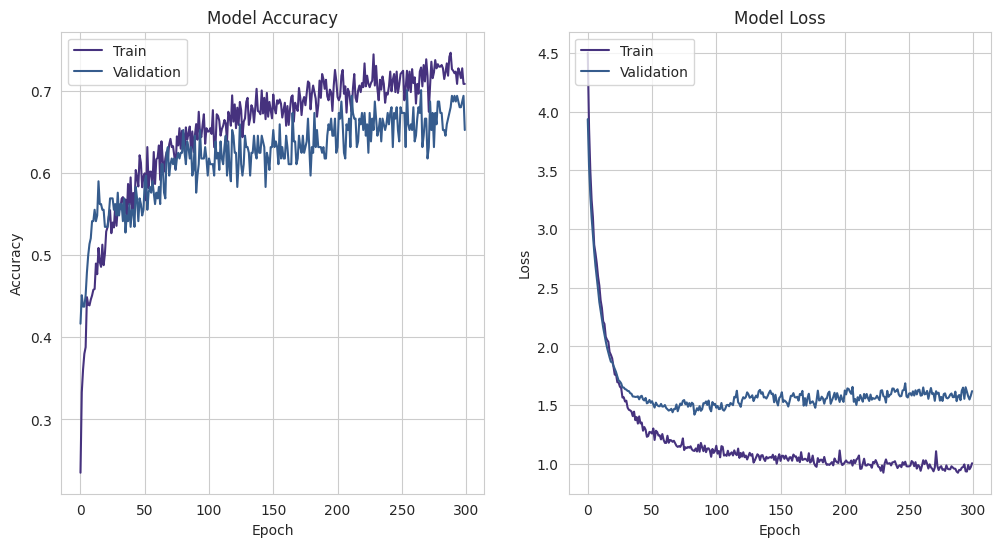

In [116]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(X_train_gru, y_train_one_hot, epochs=300, batch_size=32, validation_data=(X_val_gru, y_val_one_hot), validation_split=0.2)

# Save the model
model.save('gru_emotion_model.h5')

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Model Evaluation

In [117]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_gru, y_test_one_hot)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.6265 

Test Loss: 0.6991580724716187
Test Accuracy: 0.8252426981925964


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x738e784c7010> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step

Classification Report:
              precision    recall  f1-score   support

       Anger       0.67      0.89      0.76         9
     Anxiety       0.94      0.68      0.79        22
     Boredom       0.60      0.94      0.73        16
   Happiness       0.87      0.93      0.90        14
     Neutral       1.00      0.89      0.94        28
     Sadness       0.90      0.64      0.75        14

    accuracy                           0.83       103
   macro avg       0.83      0.83      0.81       103
weighted avg       0.86      0.83      0.83       103



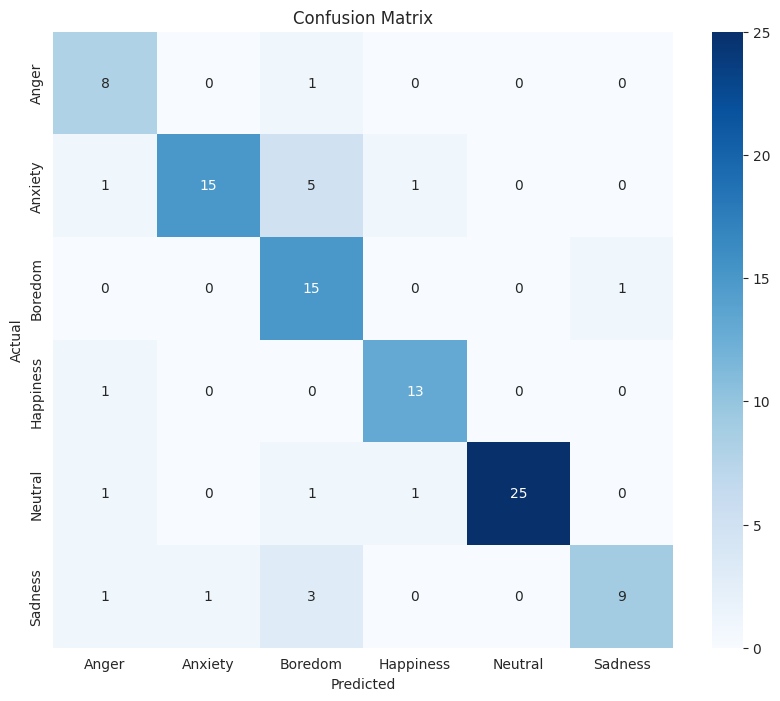

In [118]:
# Predict classes for the test set
y_test_pred = model.predict(X_test_gru)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

# Verify the correct number of classes and target names
unique_labels = np.unique(y_test_true_classes)
unique_label_names = label_encoder.inverse_transform(unique_labels)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=unique_label_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_label_names, yticklabels=unique_label_names, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [134]:
model.predict(X_test_gru)[0,:]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([3.1746749e-05, 1.9798547e-01, 6.7478269e-02, 6.2067531e-02,
       7.9256497e-02, 5.0910783e-01, 8.4072597e-02], dtype=float32)